In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("liberaries imported successfully")
print(f"current date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

liberaries imported successfully
current date: 2025-12-24 13:54:42


In [ ]:
FRED_BASE_URL = "https://api.stlouisfed.org/fred/series/observations"
API_KEY = "f35df08f65353f48d170b63c2a210a17"
DEBT_TO_GDP_SERIES_ID = "GGGDTAJPA188N"

def fetch_fred_data(series_id, start_date="1990-01-01", end_date="2025-12-31"):
    """
    FETCH data from FRED API

    parameters:
    -series_id: FRED series Identifier
    -start_date: start date for data (YYYY-MM-DD)
    -end_date: end date for data (YYYY-MM-DD)
    Returns:
    -JSON response from API 
    """
    params = {
        "series_id": series_id,
        "api_key": API_KEY,
        "file_type": "json",
        "observation_start": start_date,
        "observation_end": end_date
        }
    response = requests.get(FRED_BASE_URL, params=params)

    if response.status_code == 200:
        print(f"Data fetched successfully for {series_id}")
        return response.json()
    else:
        print(f"x Error fetching data: {response.status_code}")
        print("x Response: {response.text}")
        return None
print("Function defined ready to fetch data")



Function defined ready to fetch data


In [8]:
print("Fetching Debt to GDP data from FRED API...")
debt_data_raw = fetch_fred_data(
    series_id= DEBT_TO_GDP_SERIES_ID,
    start_date="1990-01-01",
    end_date="2025-12-31"
)
if debt_data_raw:
    print("\n Raw API Response Sturcture:")
    print(f"Keys: {debt_data_raw.keys()}")
    print(f"\nFirst observation example:")
    print(debt_data_raw['observations'][0])
    print(f"\nTotal obersvations fetched: {len(debt_data_raw['observations'])}")

Fetching Debt to GDP data from FRED API...
Data fetched successfully for GGGDTAJPA188N

 Raw API Response Sturcture:
Keys: dict_keys(['realtime_start', 'realtime_end', 'observation_start', 'observation_end', 'units', 'output_type', 'file_type', 'order_by', 'sort_order', 'count', 'offset', 'limit', 'observations'])

First observation example:
{'realtime_start': '2025-12-24', 'realtime_end': '2025-12-24', 'date': '1990-01-01', 'value': '63.233'}

Total obersvations fetched: 34


In [10]:
observations = debt_data_raw['observations']
df_debt = pd.DataFrame(observations)

print( "Raw Dataframe:")
print(df_debt.head())
print(f"\nData types: \n{df_debt.dtypes}")
print(f"\nDataFrame shape:  {df_debt.shape}")

df_debt['date'] = pd.to_datetime(df_debt['date'])
df_debt['value'] = pd.to_numeric(df_debt['value'], errors='coerce')
df_debt = df_debt.rename(columns={'value': 'debt_to_gdp'})
df_debt = df_debt[["date", "debt_to_gdp"]]
df_debt = df_debt.dropna()
df_debt = df_debt.sort_values(by='date').reset_index(drop=True)

print("Processed Dataframe:")
print(df_debt.head())
print(f"\nDate range: {df_debt['date'].min()} to {df_debt['date'].max()}")
print(f"Debt-to-GDP range: {df_debt['debt_to_gdp'].min():.1f}% to {df_debt['debt_to_gdp'].max():.1f}%")


Raw Dataframe:
  realtime_start realtime_end        date   value
0     2025-12-24   2025-12-24  1990-01-01  63.233
1     2025-12-24   2025-12-24  1991-01-01  62.385
2     2025-12-24   2025-12-24  1992-01-01  66.766
3     2025-12-24   2025-12-24  1993-01-01  72.838
4     2025-12-24   2025-12-24  1994-01-01  84.361

Data types: 
realtime_start    object
realtime_end      object
date              object
value             object
dtype: object

DataFrame shape:  (34, 4)
Processed Dataframe:
        date  debt_to_gdp
0 1990-01-01       63.233
1 1991-01-01       62.385
2 1992-01-01       66.766
3 1993-01-01       72.838
4 1994-01-01       84.361

Date range: 1990-01-01 00:00:00 to 2023-01-01 00:00:00
Debt-to-GDP range: 62.4% to 258.4%


✓ Chart saved as 'japan_debt_to_gdp.png'


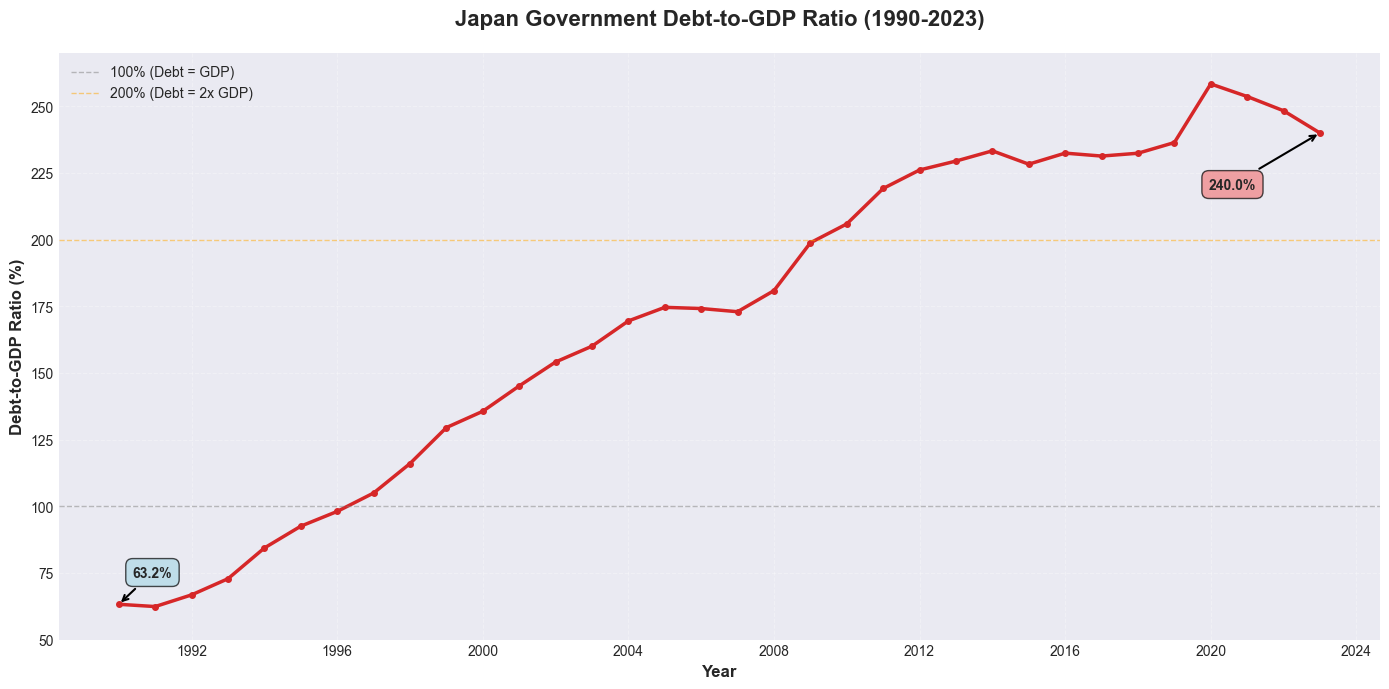


📊 Summary Statistics:
Starting Debt-to-GDP (1990): 63.2%
Current Debt-to-GDP (2023): 240.0%
Increase: 176.7 percentage points
Growth rate: 279.5%


In [11]:

fig, ax = plt.subplots(figsize=(14, 7))


ax.plot(df_debt['date'], df_debt['debt_to_gdp'], 
        linewidth=2.5, color='#d62728', marker='o', markersize=4)


ax.set_title('Japan Government Debt-to-GDP Ratio (1990-2023)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Debt-to-GDP Ratio (%)', fontsize=12, fontweight='bold')


ax.grid(True, alpha=0.3, linestyle='--')


ax.axhline(y=100, color='gray', linestyle='--', linewidth=1, alpha=0.5, label='100% (Debt = GDP)')
ax.axhline(y=200, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='200% (Debt = 2x GDP)')


ax.annotate(f'{df_debt.iloc[0]["debt_to_gdp"]:.1f}%', 
            xy=(df_debt.iloc[0]['date'], df_debt.iloc[0]['debt_to_gdp']),
            xytext=(10, 20), textcoords='offset points',
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.7),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5))


ax.annotate(f'{df_debt.iloc[-1]["debt_to_gdp"]:.1f}%', 
            xy=(df_debt.iloc[-1]['date'], df_debt.iloc[-1]['debt_to_gdp']),
            xytext=(-80, -40), textcoords='offset points',
            fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.7),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5))


ax.legend(loc='upper left', fontsize=10)


ax.set_ylim(50, 270)


plt.tight_layout()


plt.savefig('japan_debt_to_gdp.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'japan_debt_to_gdp.png'")

plt.show()

print("\n📊 Summary Statistics:")
print(f"Starting Debt-to-GDP (1990): {df_debt.iloc[0]['debt_to_gdp']:.1f}%")
print(f"Current Debt-to-GDP (2023): {df_debt.iloc[-1]['debt_to_gdp']:.1f}%")
print(f"Increase: {df_debt.iloc[-1]['debt_to_gdp'] - df_debt.iloc[0]['debt_to_gdp']:.1f} percentage points")
print(f"Growth rate: {((df_debt.iloc[-1]['debt_to_gdp'] / df_debt.iloc[0]['debt_to_gdp']) - 1) * 100:.1f}%")

In [12]:

JPYUSD_SERIES = "DEXJPUS"

print("Fetching JPY/USD exchange rate data...")
jpyusd_data_raw = fetch_fred_data(
    series_id=JPYUSD_SERIES,
    start_date="2000-01-01",  
    end_date="2025-12-31"
)


if jpyusd_data_raw:
    observations = jpyusd_data_raw['observations']
    df_jpyusd = pd.DataFrame(observations)
    

    df_jpyusd['date'] = pd.to_datetime(df_jpyusd['date'])
    df_jpyusd['value'] = pd.to_numeric(df_jpyusd['value'], errors='coerce')
    df_jpyusd = df_jpyusd.rename(columns={'value': 'exchange_rate'})
    df_jpyusd = df_jpyusd[['date', 'exchange_rate']]
    df_jpyusd = df_jpyusd.dropna()
    df_jpyusd = df_jpyusd.sort_values('date').reset_index(drop=True)
    
    print(f"\n✓ Data cleaned successfully!")
    print(f"Date range: {df_jpyusd['date'].min()} to {df_jpyusd['date'].max()}")
    print(f"Exchange rate range: {df_jpyusd['exchange_rate'].min():.2f} to {df_jpyusd['exchange_rate'].max():.2f} JPY/USD")
    print(f"Total observations: {len(df_jpyusd)}")
    print(f"\nFirst 5 rows:")
    print(df_jpyusd.head())
    print(f"\nLast 5 rows:")
    print(df_jpyusd.tail())

Fetching JPY/USD exchange rate data...
Data fetched successfully for DEXJPUS

✓ Data cleaned successfully!
Date range: 2000-01-03 00:00:00 to 2025-12-19 00:00:00
Exchange rate range: 75.72 to 161.73 JPY/USD
Total observations: 6511

First 5 rows:
        date  exchange_rate
0 2000-01-03         101.70
1 2000-01-04         103.09
2 2000-01-05         103.77
3 2000-01-06         105.19
4 2000-01-07         105.17

Last 5 rows:
           date  exchange_rate
6506 2025-12-15         155.29
6507 2025-12-16         154.80
6508 2025-12-17         155.60
6509 2025-12-18         155.53
6510 2025-12-19         157.43


✓ Chart saved as 'jpyusd_exchange_rate.png'


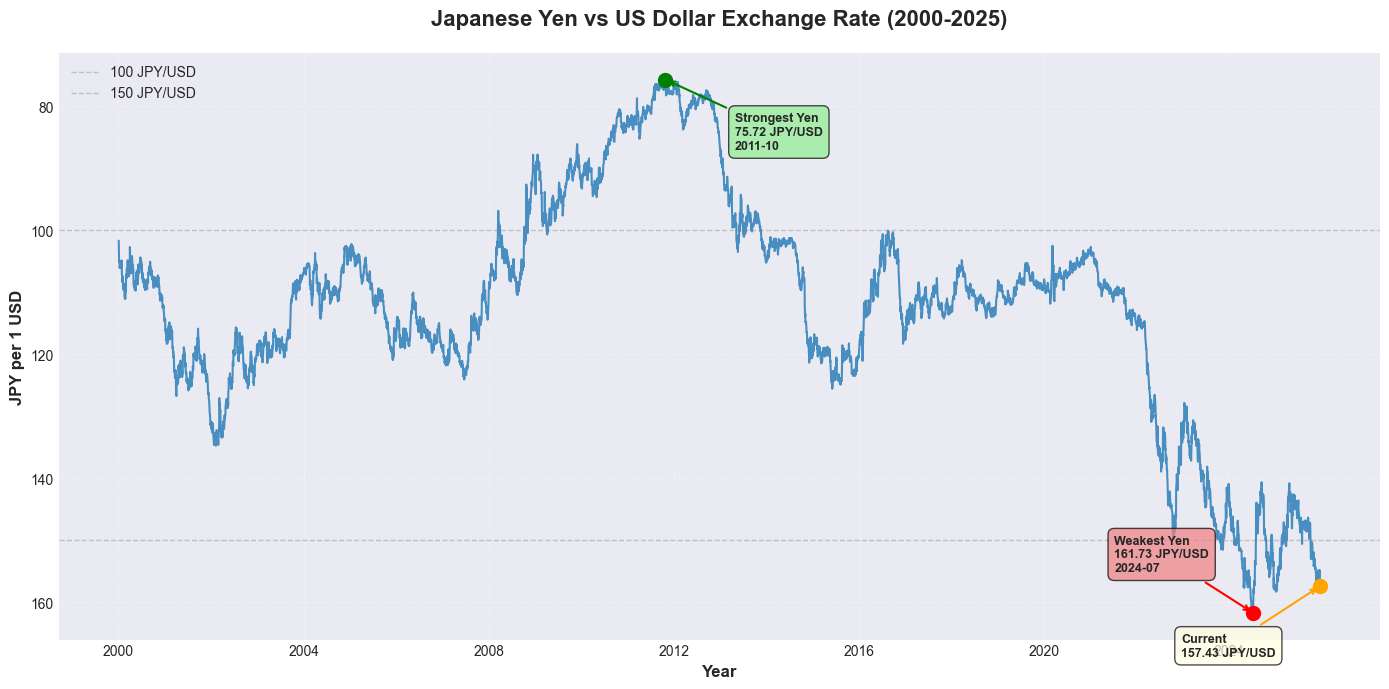


📊 JPY/USD Summary:
Starting rate (2000): 101.70 JPY/USD
Current rate (2025): 157.43 JPY/USD
Strongest Yen: 75.72 on 2011-10-28
Weakest Yen: 161.73 on 2024-07-10
Yen depreciation since 2000: 54.8%
Yen depreciation from strongest point: 107.9%


In [13]:

fig, ax = plt.subplots(figsize=(14, 7))


ax.plot(df_jpyusd['date'], df_jpyusd['exchange_rate'], 
        linewidth=1.5, color='#1f77b4', alpha=0.8)


ax.set_title('Japanese Yen vs US Dollar Exchange Rate (2000-2025)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('JPY per 1 USD', fontsize=12, fontweight='bold')


ax.grid(True, alpha=0.3, linestyle='--')


min_idx = df_jpyusd['exchange_rate'].idxmin()
max_idx = df_jpyusd['exchange_rate'].idxmax()


ax.scatter(df_jpyusd.loc[min_idx, 'date'], 
          df_jpyusd.loc[min_idx, 'exchange_rate'],
          color='green', s=100, zorder=5)
ax.annotate(f'Strongest Yen\n{df_jpyusd.loc[min_idx, "exchange_rate"]:.2f} JPY/USD\n{df_jpyusd.loc[min_idx, "date"].strftime("%Y-%m")}', 
            xy=(df_jpyusd.loc[min_idx, 'date'], df_jpyusd.loc[min_idx, 'exchange_rate']),
            xytext=(50, -50), textcoords='offset points',
            fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.7),
            arrowprops=dict(arrowstyle='->', color='green', lw=1.5))


ax.scatter(df_jpyusd.loc[max_idx, 'date'], 
          df_jpyusd.loc[max_idx, 'exchange_rate'],
          color='red', s=100, zorder=5)
ax.annotate(f'Weakest Yen\n{df_jpyusd.loc[max_idx, "exchange_rate"]:.2f} JPY/USD\n{df_jpyusd.loc[max_idx, "date"].strftime("%Y-%m")}', 
            xy=(df_jpyusd.loc[max_idx, 'date'], df_jpyusd.loc[max_idx, 'exchange_rate']),
            xytext=(-100, 30), textcoords='offset points',
            fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.7),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5))


current_value = df_jpyusd.iloc[-1]['exchange_rate']
current_date = df_jpyusd.iloc[-1]['date']
ax.scatter(current_date, current_value, color='orange', s=100, zorder=5)
ax.annotate(f'Current\n{current_value:.2f} JPY/USD', 
            xy=(current_date, current_value),
            xytext=(-100, -50), textcoords='offset points',
            fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', color='orange', lw=1.5))


ax.axhline(y=100, color='gray', linestyle='--', linewidth=1, alpha=0.4, label='100 JPY/USD')
ax.axhline(y=150, color='gray', linestyle='--', linewidth=1, alpha=0.4, label='150 JPY/USD')


ax.legend(loc='upper left', fontsize=10)


ax.invert_yaxis()


plt.tight_layout()


plt.savefig('jpyusd_exchange_rate.png', dpi=300, bbox_inches='tight')
print("✓ Chart saved as 'jpyusd_exchange_rate.png'")

plt.show()


print("\n📊 JPY/USD Summary:")
print(f"Starting rate (2000): {df_jpyusd.iloc[0]['exchange_rate']:.2f} JPY/USD")
print(f"Current rate (2025): {current_value:.2f} JPY/USD")
print(f"Strongest Yen: {df_jpyusd.loc[min_idx, 'exchange_rate']:.2f} on {df_jpyusd.loc[min_idx, 'date'].strftime('%Y-%m-%d')}")
print(f"Weakest Yen: {df_jpyusd.loc[max_idx, 'exchange_rate']:.2f} on {df_jpyusd.loc[max_idx, 'date'].strftime('%Y-%m-%d')}")
print(f"Yen depreciation since 2000: {((current_value / df_jpyusd.iloc[0]['exchange_rate']) - 1) * 100:.1f}%")
print(f"Yen depreciation from strongest point: {((current_value / df_jpyusd.loc[min_idx, 'exchange_rate']) - 1) * 100:.1f}%")